# Polynomial Linear Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model

$$
{\displaystyle y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon .\,}
$$

https://en.wikipedia.org/wiki/Polynomial_regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Example
Salary vs. YearsExperienced

### Step1: Load Dataset

In [2]:
# 'Employee_Salary.csv' 파일 읽기 pd.read_csv()
# df shape 확인

df = pd.read_csv('Employee_Salary.csv')
df.shape

(2000, 2)

In [3]:
# df tail 행 보기

df.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [4]:
# df descriptive statistics

df.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


### Step2: Visualize Dataset

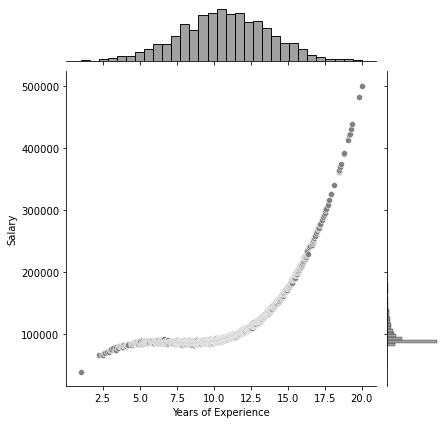

In [5]:
# sns.jointplot 활용한 시각화. x='Years of Experience	', y='Salary'

sns.jointplot(x='Years of Experience', y='Salary', data = df, color = 'gray')

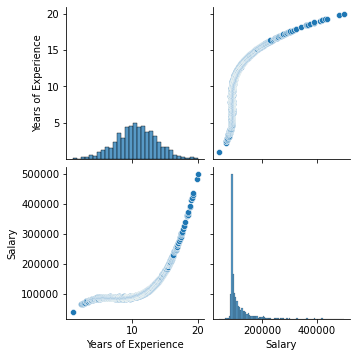

In [6]:
# sns.pairplot()

sns.pairplot(df)

### Step3: Define Train set and Test Set

In [7]:
# X에 -1번째 column까지 할당
# y에 -1번째 column을 할당

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step4: Train Model

In [9]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_regressor에 PolynomialFeatures(degree=2) 으로 상수항, x, x^2 할당
# X_train으로 poly_regressor에 fit

from sklearn.preprocessing import PolynomialFeatures

poly_regressor = PolynomialFeatures(degree=2)
poly_regressor.fit(X_train)

PolynomialFeatures()

In [10]:
# X_train_poly 에 fitting된 poly_regressor를 활용하여 transform

X_train_poly = poly_regressor.transform(X_train)
X_train_poly

array([[  1.        ,   9.18154382,  84.30074692],
       [  1.        ,   6.40354414,  41.0053776 ],
       [  1.        ,  14.87221216, 221.18269453],
       ...,
       [  1.        ,  13.55698336, 183.79179782],
       [  1.        ,   9.07425455,  82.34209573],
       [  1.        ,   9.56750172,  91.5370891 ]])

In [11]:
# import statsmodels.api as sm
# model을 sm.OLS(y, X).fit() 을 이용해서 X_train셋으로 학습.

import statsmodels.api as sm

model = sm.OLS(y_train, X_train_poly)
result = model.fit()

In [12]:
# summary()를 이용한 model 의 성능 확인

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.097e+04
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:57:46   Log-Likelihood:                -17263.
No. Observations:                1600   AIC:                         3.453e+04
Df Residuals:                    1597   BIC:                         3.455e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.12e+05   2812.669     75.383      0.000    2.07e+05    2.18e+05
x1         -3.394e+04    529.510    -64.106      0.000    -3.5e+04   -3.29e+04
x2          2129.5645     24.190     88.035      0.000    2082.117    2177.012
==============================================================================
Omnibus:                      460.895   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50428.260
Skew:                          -0.079   Prob(JB):                         0.00
Kurtosis:                      30.503   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Condition number problem solution

condition number: 조건수(condition number)는 argument에서 의 작은 변화의 비율에 대해 함수가 얼마나 변화할 수 있는지에 대한 argument measure이다. 20이상일 경우 모형의 안정성에 문제가 있다고 판단할 수 있다.

- 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우. 이 경우에는 스케일링(scaling)으로 해결한다.
- 다중 공선성 즉, 상관관계가 큰 독립 변수들이 있는 경우, 이 경우에는 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결한다.
  - 다중공선성 
    - 문제: 회귀분석의 전제 각 feature이 독립변수라는 가정을 위배함.
    - 진단법: 분산팽창요인(Variance Inflation Factor)를 구하여 이 값이 10을 넘는다면 보통 다중공선성의 문제가 있다.
      - VIF: variance_inflation_factor
        - VIF = 1/(1-R2)
          - R2: 하나의 feature에 대해 나머지 feature변수를 선형회귀시킨 후의 R2(R2 basic: 회귀선으로 설명되는 제곱합 / 총제곱합)
        - e.g. VIF가 1.8이라는 것은 특정 회귀계수의 분산(표준오차의 제곱)이 만약 해당 예측변수가 나머지 예측변수와 완전히 상관관계가 없다면 가졌을 분산보다 80% 크다는 의미이다.

reference.  
https://datascienceschool.net/03%20machine%20learning/04.03%20%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.html  
https://ko.wikipedia.org/wiki/%EC%A1%B0%EA%B1%B4%EC%88%98  
https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1  
https://ukchanoh.wordpress.com/2015/02/16/multicollinearity/

In [13]:
# condition no. 문제가 숫자가 클 경우 일어날 수 있기 때문에 이를 해결
# scaling with StandardScaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [14]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_regressor에 PolynomialFeatures(degree=2) 으로 상수항, x, x^2 할당
# X_train으로 poly_regressor에 fit

from sklearn.preprocessing import PolynomialFeatures

poly_regressor = PolynomialFeatures(degree=2)
poly_regressor.fit(X_train)

PolynomialFeatures()

In [15]:
# X_train_poly 에 fitting된 poly_regressor를 활용하여 transform

X_train_poly = poly_regressor.transform(sc.transform(X_train))
X_train_poly

array([[ 1.        , -0.53797139,  0.28941321],
       [ 1.        , -1.47799703,  2.18447523],
       [ 1.        ,  1.3876495 ,  1.92557112],
       ...,
       [ 1.        ,  0.94259948,  0.88849378],
       [ 1.        , -0.57427617,  0.32979311],
       [ 1.        , -0.4073701 ,  0.1659504 ]])

In [16]:
# import statsmodels.api as sm
# model을 sm.OLS(y, X).fit() 을 이용해서 X_train셋으로 학습.

import statsmodels.api as sm

model = sm.OLS(y_train, X_train_poly)
result = model.fit()

In [17]:
# summary()를 이용한 model 의 성능 확인

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.097e+04
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:57:46   Log-Likelihood:                -17263.
No. Observations:                1600   AIC:                         3.453e+04
Df Residuals:                    1597   BIC:                         3.455e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.347e+04    361.804    258.355      0.000    9.28e+04    9.42e+04
x1          3.526e+04    293.734    120.047      0.000    3.47e+04    3.58e+04
x2           1.86e+04    211.262     88.035      0.000    1.82e+04     1.9e+04
==============================================================================
Omnibus:                      460.895   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50428.260
Skew:                          -0.079   Prob(JB):                         0.00
Kurtosis:                      30.503   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### VIF
variance_inflation_factor
- VIF = 1/(1-R2)
  - R2: 하나의 feature에 대해 나머지 feature변수를 선형회귀시킨 후의 R2
  - e.g. VIF가 1.8이라는 것은 특정 회귀계수의 분산(표준오차의 제곱)이 만약 해당 예측변수가 나머지 예측변수와 완전히 상관관계가 없다면 가졌을 분산보다 80% 크다는 의미이다.

In [18]:
# 다중공선성 문제 확인

# from statsmodels.stats.outliers_influence import variance_inflation_factor
# model.exog_name으로 feature 이름 가져올 수 있음
# variance_inflation_factor(model.exog, i)

from statsmodels.stats.outliers_influence import variance_inflation_factor

dict_vif = dict()
for i, feature in enumerate(model.exog_names):
    dict_vif[feature] = variance_inflation_factor(model.exog, i)
dict_vif

{'const': 1.5173457655890605,
 'x1': 1.0001056455114996,
 'x2': 1.0001056455114994}

### Step5: Predict value

In [19]:
# predict y values with trained regressor

# model.predict 활용하여 X_test로 y_pred 생성. 
# X_test에는 polinomial term이 생기도록 poly_regressor.transform 해주어야 함.

X_test_poly = poly_regressor.transform(sc.transform(X_test))
y_pred = result.predict(X_test_poly)

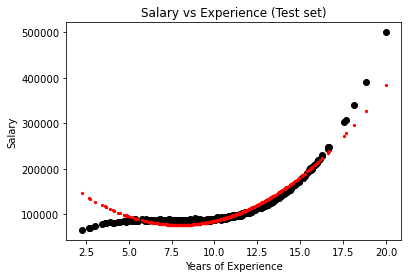

In [20]:
# test set visualization
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred, color='red', s=5)

plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()